# Normalization

Normalization is used to elliminate the unit just keep the magnitude that to on the common skale

## MinMax Normalization

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1. ... That data is just as squished as before!

<img src="images/standardization.png" width=400 height=400 />

In [1]:
#!jt -l

Usage to change notebook theme:

    Enable the toolbar: ! jt -t [theme name] -T.
    Enable the filename and logo: ! jt -t [theme name] -N.
    Enable the kernel logo: ! jt -t [theme name] -kl.

In [2]:
#!jt -t 'monokai' -T -N -kl
#!jt -r

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/home/saad/Downloads/winequality-red.csv',
                 usecols=['pH','alcohol','quality'])
df

,pH,alcohol,quality
0,3.51,9.4,5
1,3.20,9.8,5
2,3.26,9.8,5
3,3.16,9.8,6
4,3.51,9.4,5
...,...,...,...
1594,3.45,10.5,5
1595,3.52,11.2,6
1596,3.42,11.0,6
1597,3.57,10.2,5


In [5]:
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.head()

,pH,alcohol,quality
0,3.51,9.4,5
1,3.20,9.8,5
2,3.26,9.8,5
3,3.16,9.8,6
4,3.51,9.4,5


In [7]:
df.isnull().sum()

pH         0
alcohol    0
quality    0
dtype: int64

<AxesSubplot:title={'center':'pH'}, xlabel='pH', ylabel='Density'>

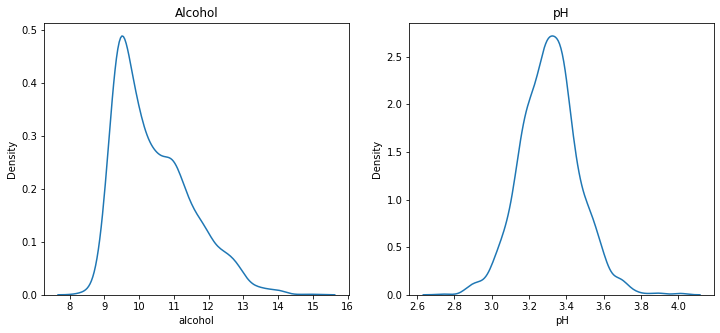

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Alcohol")
sns.kdeplot(df['alcohol'], ax=ax1)

ax2.set_title("pH")
sns.kdeplot(df['pH'], ax=ax2)

<AxesSubplot:xlabel='alcohol', ylabel='pH'>

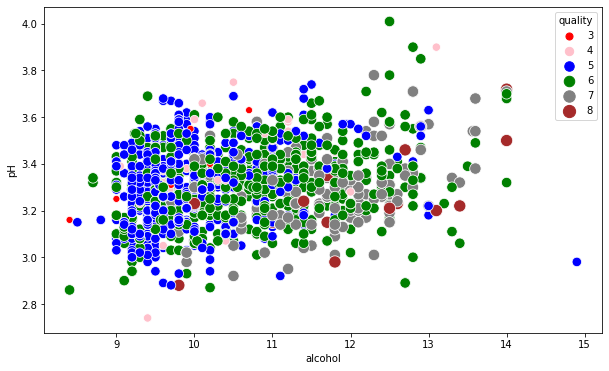

In [9]:
plt.figure(figsize=(10,6))
color_dict = {3:'r',4:'pink',5:'b',6:'g',7:'gray',8:'brown'}
sns.scatterplot(df['alcohol'], df['pH'], palette=color_dict,hue=df['quality'],size=df['quality'],
               sizes=(50,150))

## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('quality', axis=1),df['quality'],
                                              test_size=0.2, random_state=True)

In [12]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)

Shape of X_train:  (1279, 2)
Shape of X_test:  (320, 2)


## Normalization Using Minmax Scalar

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
# fit the scalar to the train set it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
X_train.describe().round(1)

,pH,alcohol
count,1279.0,1279.0
mean,3.3,10.4
std,0.2,1.1
min,2.7,8.4
25%,3.2,9.5
50%,3.3,10.2
75%,3.4,11.1
max,4.0,14.9


In [18]:
X_train_scaled.describe().round(1) # so we can see that the minimum value after 
# minmax normalization is 0 and the maximum value is 1

,pH,alcohol
count,1279.0,1279.0
mean,0.5,0.3
std,0.1,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.4,0.3
75%,0.5,0.4
max,1.0,1.0


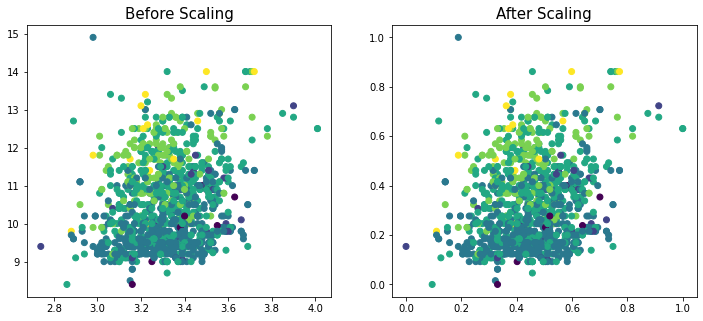

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['pH'], X_train['alcohol'], c=y_train)
ax1.set_title("Before Scaling", size=15)
ax2.scatter(X_train_scaled['pH'], X_train_scaled['alcohol'], c=y_train)
ax2.set_title("After Scaling", size=15)
plt.show()

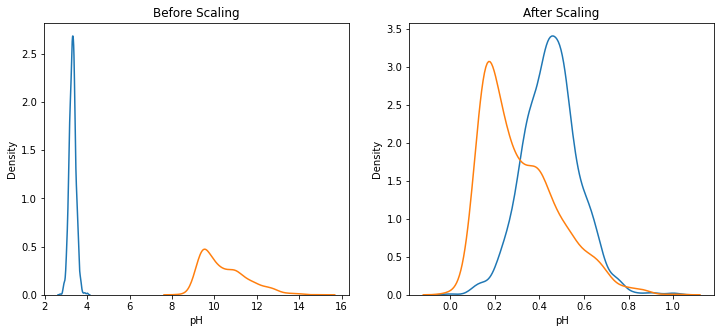

In [20]:
# let's plot the pdf (probability density function)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['pH'], ax=ax1)  # kernel density estimation plot(kdeplot)
sns.kdeplot(X_train['alcohol'], ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['pH'], ax=ax2)
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
plt.show()

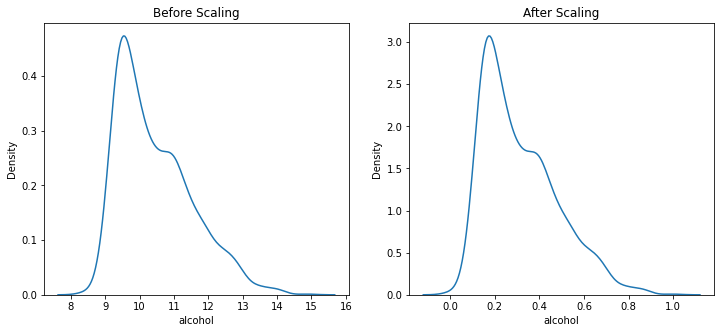

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['alcohol'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
plt.show()

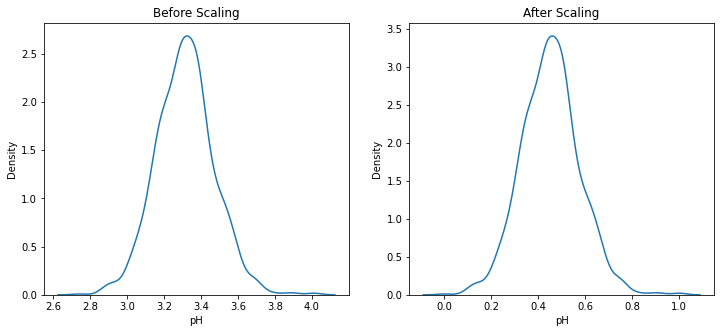

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['pH'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['pH'], ax=ax2)
plt.show()

In [23]:
# the disadvantage is that when we apply the minmax scalar
# and it squeeze our data between 0 to 1 range then it impact on outliers which is not good
# other wise it is best

# Other Methods

### ***1.Mean Normalization***

In this method we are doing mean centring same as standardization.It gives the value between -1 to +1.
We use it rarely. Note: there is no library in sklearn we do this self based.It is useful on those elgorithms where we need
     centered data. Mostly people use standardization instead of this.

Mean Normalization is a way to implement Feature Scaling. What Mean normalization does is that it calculates and subtracts the mean for every feature. A common practice is also to divide this value by the range or the standard deviation.

<img src="images/mean normalization.png" height=400 width=400 />

### ***2.MaxAbsScaler(maximum absolute scaling)***

It is useful for sparse Data(where values are in big ammount of zeros).

MaxAbsScaler (*, copy=True)[source] Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity

<img src="images/max_absolute_scaling.png" height=400 width=400 />

### ***3.Robust Scaling***

It performs generally best if our data has lot of outliers.

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

<img src="images/robust_scaling.png" height=400 width=400 />

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile.